In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
df = pd.read_csv('train_feat.csv')

In [3]:
df.head()

,ID,Type,F0,F1,F2,F3,F4,F5,F6,F7,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
0,B00000,O,-7,9,2,0,1,3,0.018661,0.033087,...,0.261922,5.374833,-0.244051,6,0,66.518847,0,67.529544,70.754717,0.936
1,B00001,O,16,0,18,1,1,3,0.340250,0.542241,...,0.334393,11.151970,2.338377,8,0,66.518847,2,94.637224,153.061225,1.288
2,B00002,O,-27,27,0,0,0,0,0.065454,0.024133,...,0.118206,6.579651,1.270140,14,0,92.592593,0,108.794198,122.950820,0.680
3,B00003,N,-24,24,0,0,0,0,0.015118,0.008164,...,0.043204,17.917860,3.454199,2,0,80.645161,0,83.160083,86.206897,0.768
4,B00004,N,-10,10,0,0,0,0,0.015908,0.018113,...,0.183005,5.296747,-0.352397,0,0,61.983471,0,66.777963,133.928571,1.000


In [4]:
#Basic information about numerical values in the dataset
df.describe()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
count,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,...,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000
mean,-5.010642,9.290002,4.520671,0.120655,0.573725,2.300031,0.096836,0.126552,0.132732,0.064016,...,0.196174,13.582726,1.201046,2.134283,0.073343,69.890977,1.269331,74.272472,103.665849,0.982629
std,13.191543,8.316621,7.053515,0.882754,1.890958,3.865684,0.112028,0.169311,0.186497,0.095972,...,0.161510,13.577910,2.148005,4.441734,0.572695,15.640697,5.676274,25.343729,41.176101,0.241950
min,-55.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000382,1.388939,-15.563153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.022209,0.019392,0.023584,0.008272,...,0.067952,7.162740,-0.035668,0.000000,0.000000,59.760956,0.000000,63.770430,72.815534,0.832000
50%,-6.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.050370,0.042847,0.048759,0.018907,...,0.150030,11.113988,1.413245,0.000000,0.000000,67.567568,0.000000,73.126143,88.235294,0.952000
75%,2.000000,15.000000,6.000000,0.000000,0.000000,3.000000,0.145311,0.193612,0.163994,0.106128,...,0.286833,16.658501,2.757871,2.000000,0.000000,77.120823,0.000000,84.865629,125.000000,1.104000
max,48.000000,55.000000,46.000000,24.000000,29.000000,38.000000,1.352993,2.061968,2.236467,4.371038,...,0.861817,357.190570,14.984042,57.000000,14.000000,184.049080,63.000000,201.342282,202.702703,7.984000


In [5]:
#to check the types of data in the dataset and to further convert all training data into float32.
df.dtypes

ID       object
Type     object
F0        int64
F1        int64
F2        int64
         ...   
F183    float64
F184      int64
F185    float64
F186    float64
F187    float64
Length: 190, dtype: object

<AxesSubplot:>

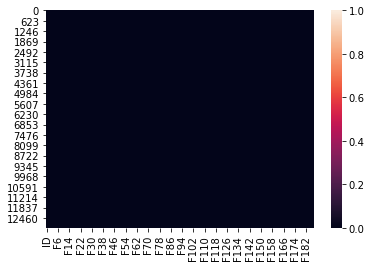

In [6]:
#To check null values of few column

cols=df.columns
sns.heatmap(df[cols].isnull())

<AxesSubplot:xlabel='F0'>

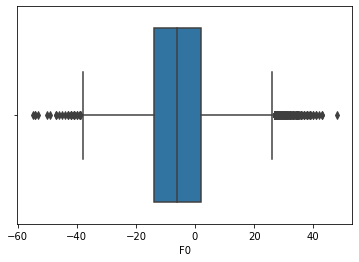

In [7]:
#To deal with outliners if we want for any column
sns.boxplot(x=df.F0)
#df=df[df['F0']<50]

In [89]:
# shuffle the dataframe before splitting
df = df.sample(frac=1)

In [90]:
# To drop if duplicate rows are used
df=df.drop_duplicates()

In [91]:
#Replace all infinite and null values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [92]:
# Classify the signals
print("The numbers of ECG signals: {} and each signal has: {} samples".format(df.shape[0], df.shape[1] - 2))
print("The categorical classes of ECG: {}".format(df["Type"].unique()))
print("Numbers of signals for each class")
print(df["Type"].value_counts())

The numbers of ECG signals: 13062 and each signal has: 188 samples
The categorical classes of ECG: ['N' 'A' 'O' '~']
Numbers of signals for each class
N    7721
O    3857
A    1160
~     324
Name: Type, dtype: int64


In [93]:
# To check for missing columns for training data
missing_data = df.isnull()
columns_missing_data = []
for column in df.columns.values.tolist():
  columnn_missing_data = missing_data[column].value_counts()
  if len(columnn_missing_data) == 2:
    print(column)
    print(columnn_missing_data)
    print("")
    columns_missing_data.append(column)

if len(columns_missing_data) == 0:
  print("none of the columns have missing values")
else:
  print("These columns have missing data:")
  print(columns_missing_data)

none of the columns have missing values


In [94]:
#Print "Type" configuration and "Type" configuration for first 5 data"
y = np.asanyarray(df["Type"])
print(np.unique(y))
print(y[0:5])

['A' 'N' 'O' '~']
['N' 'N' 'N' 'N' 'A']


In [95]:
# To split the training and testing data
df.drop(columns = ["ID", "Type"], axis = 1, inplace = True)
X = np.asanyarray(df)

In [96]:
#Print X array
X

array([[ -1.        ,   5.        ,   4.        , ...,  72.11538462,
         81.52173913,   0.96      ],
       [ 10.        ,   1.        ,  11.        , ...,  72.94832827,
         89.28571429,   0.984     ],
       [-16.        ,  16.        ,   0.        , ...,  68.33712984,
         70.75471698,   0.904     ],
       ...,
       [-18.        ,  18.        ,   0.        , ...,  64.        ,
         66.96428571,   0.984     ],
       [-16.        ,  16.        ,   0.        , ...,  68.80733945,
         70.75471698,   0.896     ],
       [  5.        ,   1.        ,   8.        , ...,  72.46376812,
        105.6338028 ,   1.24      ]])

In [97]:
#creating an array of samples
n = len(X[0])
samples = np.arange(0, n)
#class 0
x_0 = X[0]
#class 1
x_1 = X[4]
#class 2
x_2 = X[12]
#class 3
x_3 = X[21]

Text(0.5, 0, 'samples')

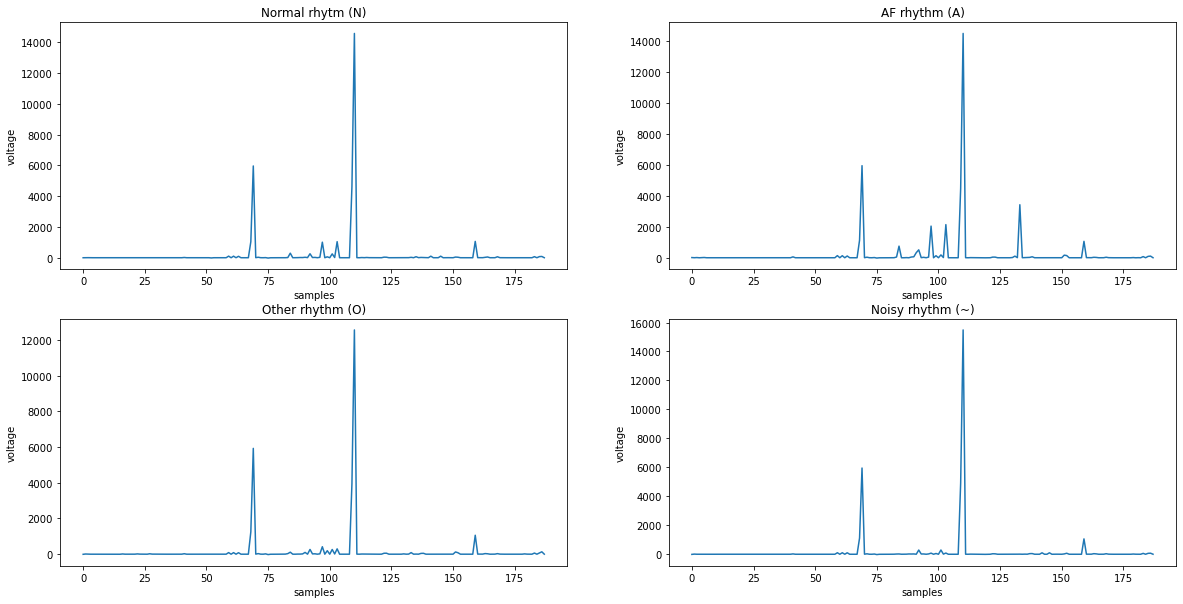

In [98]:
# To check different type of samples

fig, axes = plt.subplots(2, 2, figsize = (20,10))

sns.lineplot(x = samples, y = x_0, ax = axes[0][0])
axes[0][0].set_title("Normal rhytm (N)")
axes[0][0].set_ylabel("voltage")
axes[0][0].set_xlabel("samples")
sns.lineplot(x = samples, y = x_1, ax = axes[0][1])
axes[0][1].set_title("AF rhythm (A)")
axes[0][1].set_ylabel("voltage")
axes[0][1].set_xlabel("samples")
sns.lineplot(x = samples, y = x_2, ax = axes[1][0])
axes[1][0].set_title("Other rhythm (O)")
axes[1][0].set_ylabel("voltage")
axes[1][0].set_xlabel("samples")
sns.lineplot(x = samples, y = x_3, ax = axes[1][1])
axes[1][1].set_title("Noisy rhythm (~)")
axes[1][1].set_ylabel("voltage")
axes[1][1].set_xlabel("samples")

In [99]:
np.save("Target.npy", y)
np.save("ECG_signals.npy", X)

In [100]:
# Converting all training data to float32 type 
X = X.astype(np.float32)

In [101]:
#Splitting the training and testing data and printing its shape 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state = 21, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3918, 188) (3918,)
(9144, 188) (9144,)


              precision    recall  f1-score   support

           A       0.83      0.77      0.80       812
           N       0.86      0.93      0.89      5405
           O       0.78      0.69      0.73      2700
           ~       0.64      0.39      0.49       227

    accuracy                           0.83      9144
   macro avg       0.78      0.70      0.73      9144
weighted avg       0.83      0.83      0.83      9144



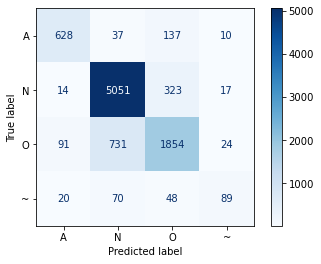

In [102]:
# Create a random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
rfc = RandomForestClassifier(n_estimators=1200, random_state=30, bootstrap = False, criterion='gini')
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)

# Check the confusion matrix
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

# To get a classification report.
print(classification_report(y_test, y_test_pred))

In [9]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/osx-64/repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/osx-64'



Note: you may need to restart the kernel to use updated packages.


In [118]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 30)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)

In [119]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG

def visualise_tree(treeclf):
    dot = export_graphviz(treeclf, filled=True, rounded=True)
    graph = graphviz.Source(dot)
    display(SVG(graph.pipe(format="svg")))

In [ ]:
# Your code here 
#DecisionTreeClassifier has got an attribute "estimators_", which is the list of individual decision trees in the forests. 
#Randomly pick two trees to visualise.
visualise_tree(rfc.estimators_[100])
visualise_tree(rfc.estimators_[120])

In [116]:
# Hyper parameter tuning using grid searchGrid search
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
from sklearn.model_selection import GridSearchCV
# use a full grid over all parameters
param_grid = {'n_estimators': [1,100], "max_depth" : [2, 8]}

# run grid search
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
report(grid_search.cv_results_)       

Model with rank: 1
Mean validation score: 0.812 (std: 0.012)
Parameters: {'max_depth': 8, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.755 (std: 0.023)
Parameters: {'max_depth': 8, 'n_estimators': 1}

Model with rank: 3
Mean validation score: 0.745 (std: 0.008)
Parameters: {'max_depth': 2, 'n_estimators': 100}



In [117]:
# A different metric e.g. AUC to score
# Bad results
#
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
from sklearn.model_selection import GridSearchCV
# use a full grid over all parameters
param_grid = {'n_estimators': [1,100], "max_depth" : [2, 8]}

# run grid search
grid_search = GridSearchCV(rfc, param_grid=param_grid,scoring='adjusted_rand_score', cv=10)
grid_search.fit(X_train, y_train)
report(grid_search.cv_results_)        

Model with rank: 1
Mean validation score: 0.517 (std: 0.028)
Parameters: {'max_depth': 8, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.415 (std: 0.046)
Parameters: {'max_depth': 8, 'n_estimators': 1}

Model with rank: 3
Mean validation score: 0.394 (std: 0.019)
Parameters: {'max_depth': 2, 'n_estimators': 100}



In [115]:
testing_data=pd.read_csv('test_feat.csv',index_col=0)
testing_data.replace([np.inf, -np.inf], np.nan, inplace=True)
testing_data.fillna(999, inplace=True)

In [27]:
missing_data = testing_data.isnull()
columns_missing_data = []
for column in testing_data.columns.values.tolist():
  columnn_missing_data = missing_data[column].value_counts()
  if len(columnn_missing_data) == 2:
    print(column)
    print(columnn_missing_data)
    print("")
    columns_missing_data.append(column)

if len(columns_missing_data) == 0:
  print("none of the columns have missing values")
else:
  print("These columns have missing data:")
  print(columns_missing_data)

none of the columns have missing values


In [81]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1200, random_state=30, bootstrap = False, criterion='gini')

clf.fit(X,y.ravel())

proba=clf.predict(testing_data.values)
results=pd.DataFrame(proba,columns=["Predicted"])
results.index=testing_data.index.values
results.index.names=["ID"]
results.to_csv("submissionRF2.csv")

In [119]:
#SVM
from sklearn.svm import SVC

clf=SVC(probability = True, C=2.57)

clf.fit(X,y.ravel())

proba=clf.predict(testing_data.values)
results=pd.DataFrame(proba,columns=["Predicted"])
results.index=testing_data.index.values
results.index.names=["ID"]
results.to_csv("submission2.csv")